# Exploratory Data Analysis (EDA)
This notebook performs exploratory data analysis on the dataset.

## Import Libraries
Import necessary libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset
Load the dataset and inspect its structure.

In [2]:
df = pd.read_csv('datasets/luxury_watches_preprocessed.csv')

In [3]:
df.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter,Case Thickness,Band Width,Dial Color,Crystal Material,Complications,Power Reserve,Price,Complication_Score
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300,40.0,13.00,20.0,Black,Sapphire,['Date'],48.0,9500.0,1
1,Omega,Seamaster,Titanium,Rubber,Automatic,600,43.5,14.47,21.0,Blue,Sapphire,['Date'],60.0,5800.0,1
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100,41.0,13.00,20.0,White,Sapphire,['Chronograph'],42.0,4200.0,3
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30,43.0,14.25,22.0,Black,Sapphire,['Chronograph'],70.0,7900.0,3
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30,31.0,6.05,20.0,Silver,Sapphire,['None'],55.0,2800.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               507 non-null    object 
 1   Model               507 non-null    object 
 2   Case Material       507 non-null    object 
 3   Strap Material      507 non-null    object 
 4   Movement Type       507 non-null    object 
 5   Water Resistance    507 non-null    int64  
 6   Case Diameter       507 non-null    float64
 7   Case Thickness      507 non-null    float64
 8   Band Width          507 non-null    float64
 9   Dial Color          507 non-null    object 
 10  Crystal Material    507 non-null    object 
 11  Complications       507 non-null    object 
 12  Power Reserve       507 non-null    float64
 13  Price               507 non-null    float64
 14  Complication_Score  507 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 59.5+ KB

## Perform EDA
Analyze the dataset using visualizations and statistical summaries.

In [5]:
num_columns = ['Water Resistance', 'Case Diameter', 'Case Thickness', 'Band Width', 'Complication_Score', 'Price']
cat_columns = ['Case Material', 'Strap Material', 'Movement Type', 'Dial Color', 'Crystal Material']

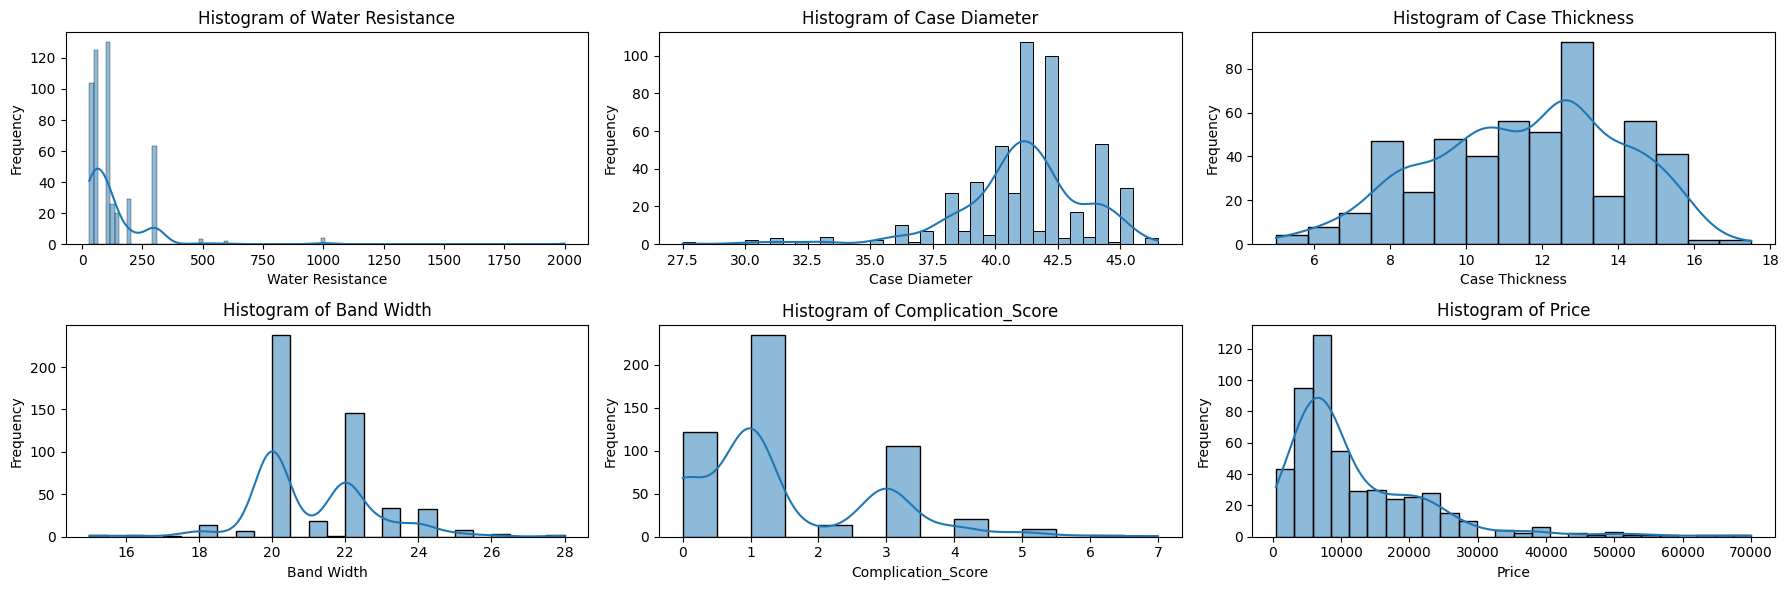

In [6]:
num_plots = len(num_columns)
n_rows = (num_plots // 3) + (num_plots % 3 > 0)

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6))

for i, col in enumerate(num_columns):
    row = i // 3
    col_idx = i % 3
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Histogram of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

for ax in axes.flatten()[num_plots:]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()

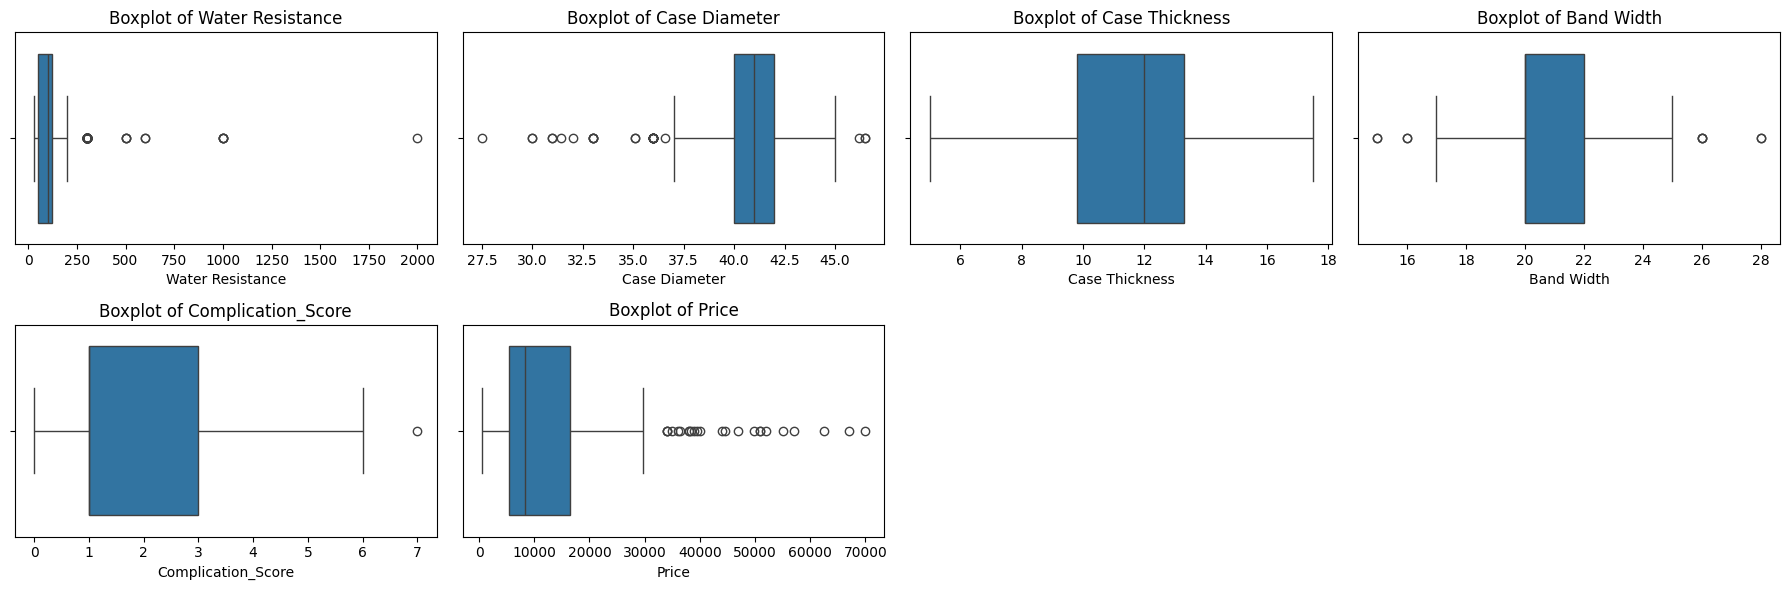

In [7]:
fig, axes = plt.subplots(n_rows, 4, figsize=(18, 6))
for i, col in enumerate(num_columns):
    row = i // 4
    col_idx = i % 4
    sns.boxplot(x=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')
    axes[row, col_idx].set_xlabel(col)

for ax in axes.flatten()[num_plots:]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()

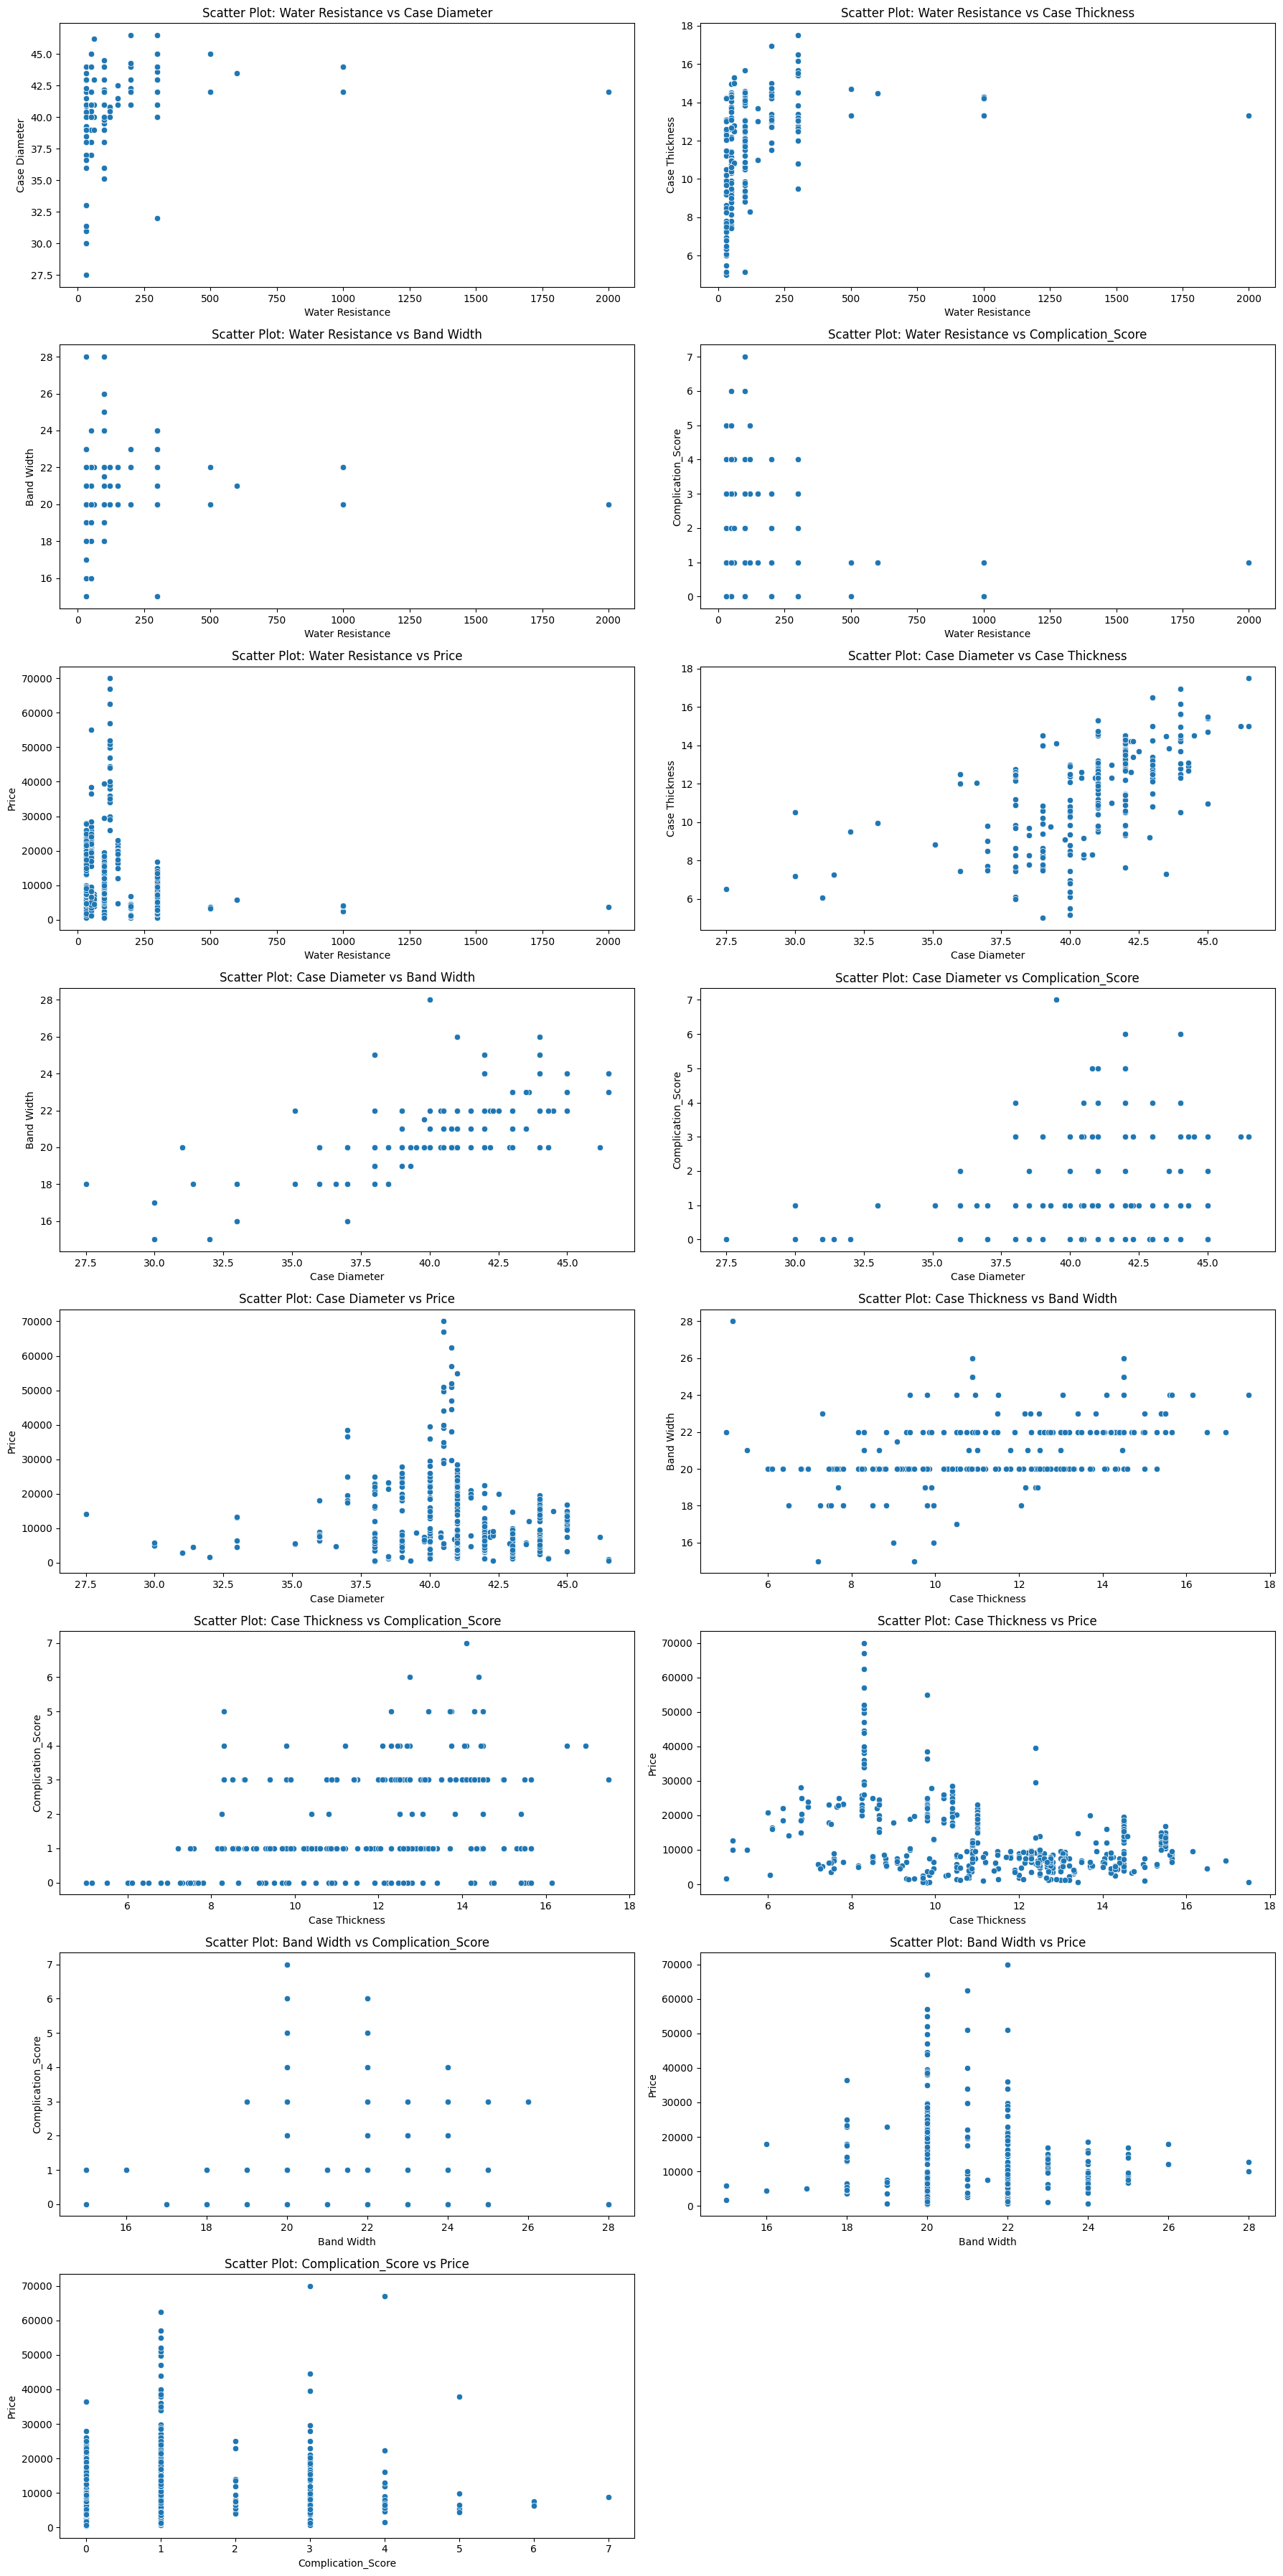

In [8]:
num_plots = len(num_columns) * (len(num_columns) - 1) // 2

n_rows = (num_plots // 2) + (num_plots % 2 > 0)
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,36))

if n_rows == 1:
    axes = axes.reshape(1, 2)

plot_idx = 0
for i in range(len(num_columns)):
    for j in range(i + 1, len(num_columns)):
        x_col = num_columns[i]
        y_col = num_columns[j]
        row = plot_idx // n_cols
        col_idx = plot_idx % n_cols
        sns.scatterplot(x=df[x_col], y=df[y_col], ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f'Scatter Plot: {x_col} vs {y_col}')
        axes[row, col_idx].set_xlabel(x_col)
        axes[row, col_idx].set_ylabel(y_col)
        plot_idx += 1

for ax in axes.flatten()[plot_idx:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

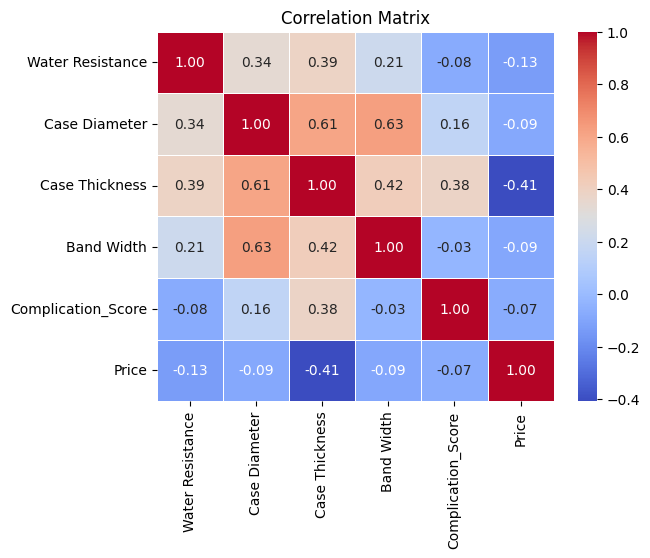

In [9]:
numeric_df = df[num_columns]
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

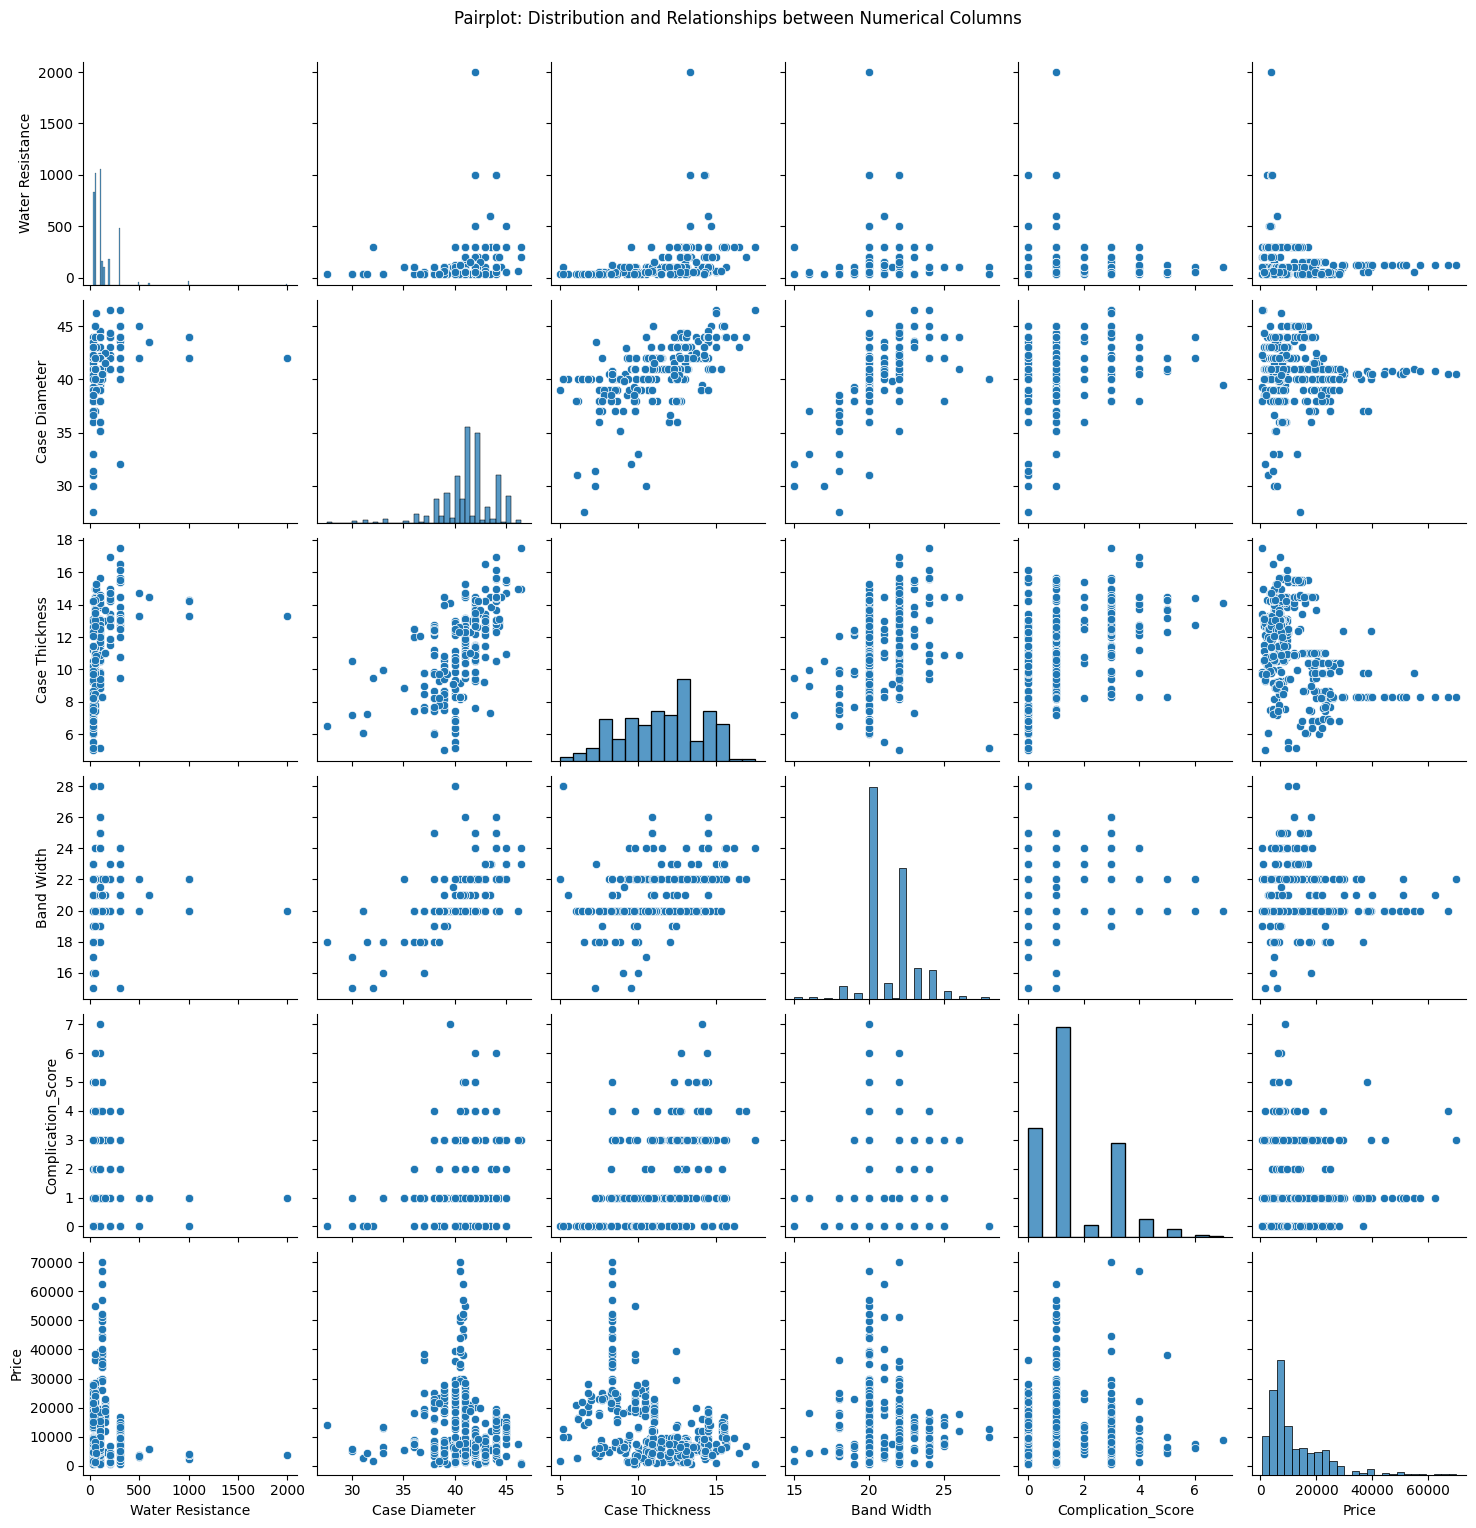

In [10]:
sns.pairplot(numeric_df)
plt.suptitle('Pairplot: Distribution and Relationships between Numerical Columns', y=1.02)
plt.show()

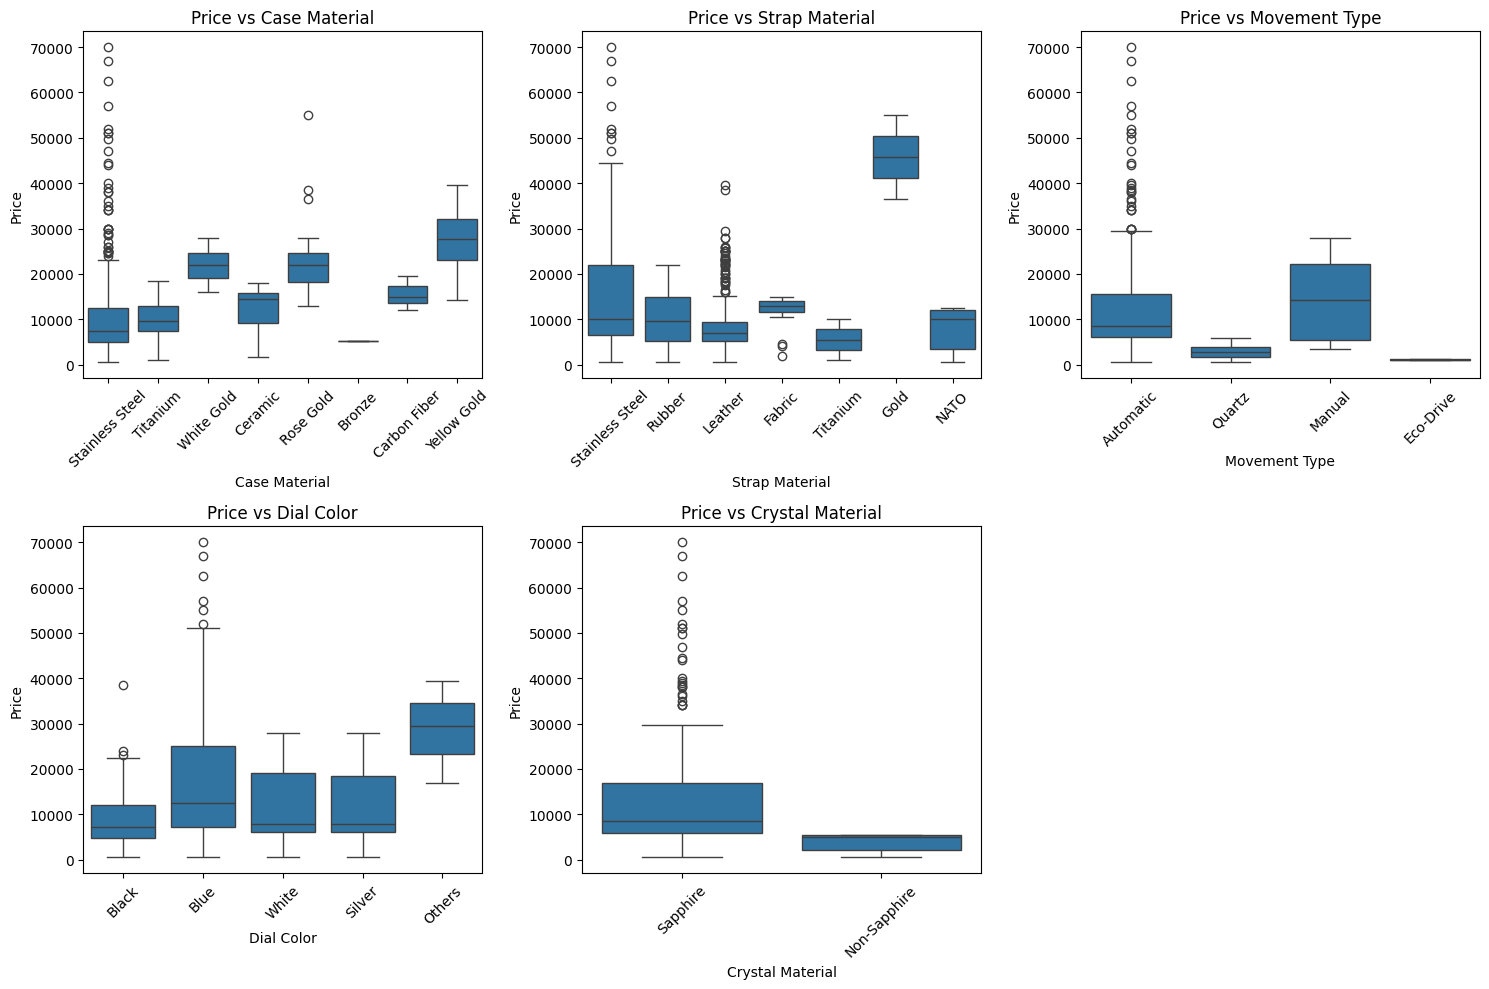

In [11]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], y=df['Price'])
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [12]:
for col in num_columns:
    print(f"Column: {col}")
    print(df[col].describe())

Column: Water Resistance
count     507.000000
mean      122.327416
std       149.161382
min        30.000000
25%        50.000000
50%       100.000000
75%       120.000000
max      2000.000000
Name: Water Resistance, dtype: float64
Column: Case Diameter
count    507.000000
mean      41.046154
std        2.535339
min       27.500000
25%       40.000000
50%       41.000000
75%       42.000000
max       46.500000
Name: Case Diameter, dtype: float64
Column: Case Thickness
count    507.000000
mean      11.588343
std        2.491481
min        5.000000
25%        9.800000
50%       12.000000
75%       13.300000
max       17.500000
Name: Case Thickness, dtype: float64
Column: Band Width
count    507.000000
mean      21.105523
std        1.658375
min       15.000000
25%       20.000000
50%       20.000000
75%       22.000000
max       28.000000
Name: Band Width, dtype: float64
Column: Complication_Score
count    507.000000
mean       1.420118
std        1.315396
min        0.000000
25%        